In [1]:
import control as ctrl
import matplotlib.pyplot as plt
import sympy as sp

# sp.init_printing()

Transfer Function Creation

In [2]:
num = [1]
den = [1, 3, 2]
sys = ctrl.TransferFunction(num, den)
s = ctrl.TransferFunction.s

State space Representation

In [3]:
A = [[0, 1], [-2, -3]]
B = [[0], [1]]
C = [[1, 0]]
D = [[0]]
ss_sys = ctrl.ss(A, B, C, D)

State space Conversion from Transfer Function

In [4]:
sys_ss = ctrl.tf2ss(sys)

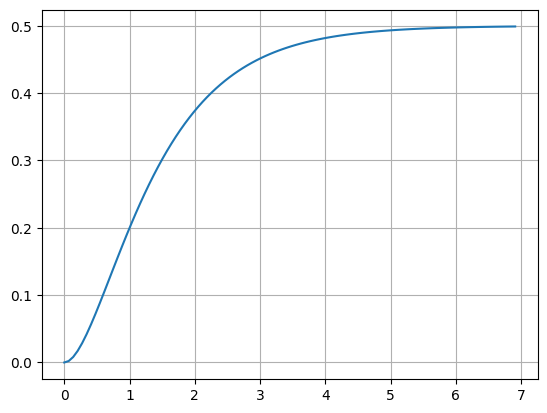

In [5]:
t, y = ctrl.step_response(sys)
plt.plot(t, y)
plt.grid()
plt.show()

Unity Feedback Response

c:\Users\drbha\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\control\timeresp.py:1088: UserWarning: Non-zero initial condition given for transfer function system. Internal conversion to state space used; may not be consistent with given X0.
  warnings.warn(


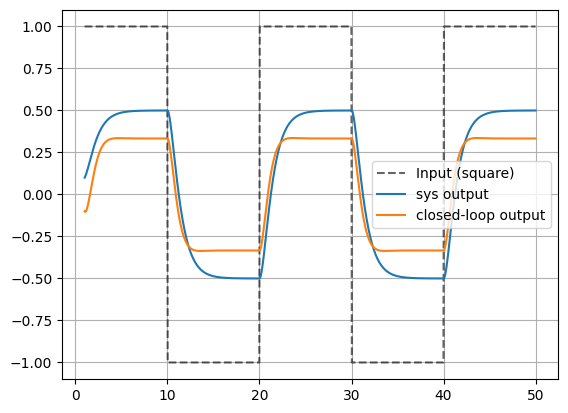

In [6]:
import numpy as np

T = ctrl.feedback(sys, 1)
t_t = 50
t = np.linspace(1, t_t, int(1 / 0.001))
f = 0.05
u = np.sign(np.sin(2 * np.pi * f * t))
# u = np.ones_like(t)

t_sys, y_sys = ctrl.forced_response(sys, T=t, U=u, x0=0.1)
t_cl, y_cl = ctrl.forced_response(T, T=t, U=u, x0=-0.1)

plt.plot(t, u, "k--", alpha=0.6, label="Input (square)")
plt.plot(t_sys, y_sys, label="sys output")
plt.plot(t_cl, y_cl, label="closed-loop output")
plt.grid()
plt.legend()
plt.show()

Sybolic Variables

In [7]:
tau, K, theta = sp.symbols("tau K theta", real=True, positive=True)
lambda_ = sp.symbols("lambda", real=True, positive=True)
K_p = sp.symbols("K_p", real=True, positive=True)
K_i = sp.symbols("K_i", real=True, positive=True)
K_d = sp.symbols("K_d", real=True, positive=True)
s = sp.symbols("s")
D = sp.symbols("D")

In [8]:
G = D * K / (tau * s + 1)
C = K_p
T = G * C / (1 + G * C)
display(T.simplify())

D*K*K_p/(D*K*K_p + s*tau + 1)

##Stability Conditions using Taylor's Series Expansion

In [9]:
den = sp.denom(T.simplify()).subs(D, 1 - theta * s)
den_coeffs = sp.Poly(den, s).all_coeffs()
display(den_coeffs)
eqns = []
for cfs in den_coeffs:
    eqns.append(sp.Gt(cfs, 0))
display(eqns)
display(sp.solve(eqns, [K_p]))

[-K*K_p*theta + tau, K*K_p + 1]

[-K*K_p*theta + tau > 0, True]

K_p < tau/(K*theta)

##Stability Conditions using Pade's Series Expansion

In [19]:
den = (
    sp.denom(T.simplify())
    .subs(D, (1 - 0.5 * theta * s) / (1 + 0.5 * theta * s))
    .simplify()
)
den = sp.collect(sp.expand(sp.numer(den), s), s)
display(den)
den_coeffs = sp.Poly(sp.numer(den), s).all_coeffs()
display(den_coeffs)
eqns = []
for cfs in den_coeffs:
    eqns.append(sp.Gt(cfs, 0))
display(eqns)
Kp = sp.solve(eqns, [K_p]).simplify()
display(Kp)
Kp = Kp.subs({theta: 0.1, tau: 1, K: 1})
display(Kp)

K*K_p + 0.5*s**2*tau*theta + s*(-0.5*K*K_p*theta + tau + 0.5*theta) + 1

[0.5*tau*theta, -0.5*K*K_p*theta + 1.0*tau + 0.5*theta, 1.0*K*K_p + 1.0]

[True, -0.5*K*K_p*theta + 1.0*tau + 0.5*theta > 0, True]

K_p < (2.0*tau + 1.0*theta)/(K*theta)

K_p < 21.0